<a href="https://colab.research.google.com/github/gautam-pai/PyTorch-Learning/blob/main/CIFAR10_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import torch
import torch.nn as nn
from torchvision import datasets,transforms
import torch.nn.functional as F
from torch.utils.data import DataLoader

## Import Datasets

In [3]:
train_data=datasets.CIFAR10(root="./data",train=True,transform=transforms.ToTensor(),download=True)
test_data=datasets.CIFAR10(root="./data",train=False,transform=transforms.ToTensor(),download=True)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
train_data

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [5]:
test_data

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [6]:
class_names = train_data.classes

## Data Exploration

torch.Size([3, 32, 32])


Text(0.5, 1.0, 'frog')

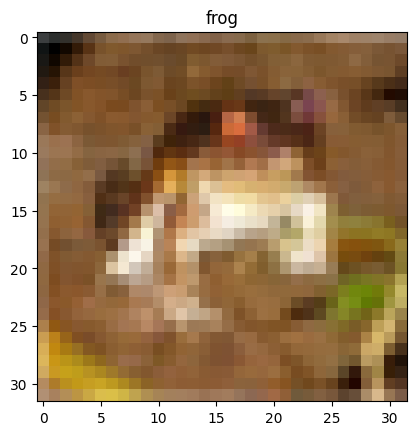

In [7]:
print(train_data[0][0].shape)
sample_image=train_data[0][0]
sample_tag=train_data[0][1]
sample_image=sample_image.permute(1,2,0)
plt.imshow(sample_image)
plt.title(class_names[sample_tag])

torch.Size([3, 32, 32])


Text(0.5, 1.0, 'ship')

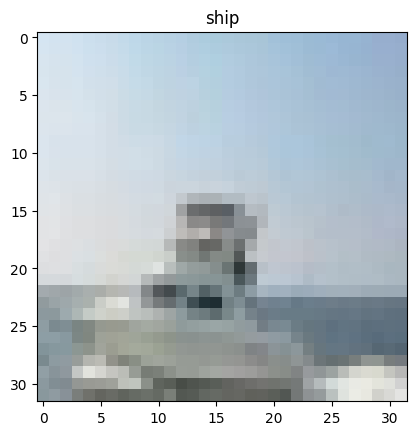

In [8]:
print(train_data[100][0].shape)
sample_image=train_data[100][0]
sample_tag=train_data[100][1]
sample_image=sample_image.permute(1,2,0)
plt.imshow(sample_image)
plt.title(class_names[sample_tag])

torch.Size([3, 32, 32])


Text(0.5, 1.0, 'dog')

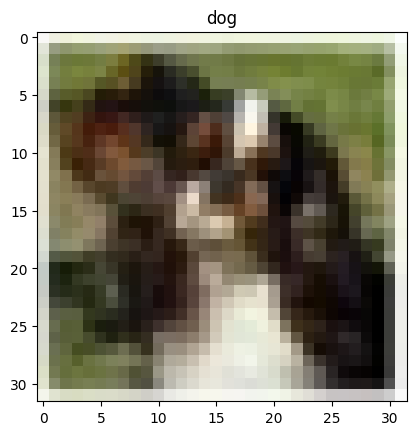

In [9]:
print(train_data[500][0].shape)
sample_image=train_data[500][0]
sample_tag=train_data[500][1]
sample_image=sample_image.permute(1,2,0)
plt.imshow(sample_image)
plt.title(class_names[sample_tag])

torch.Size([3, 32, 32])


Text(0.5, 1.0, 'frog')

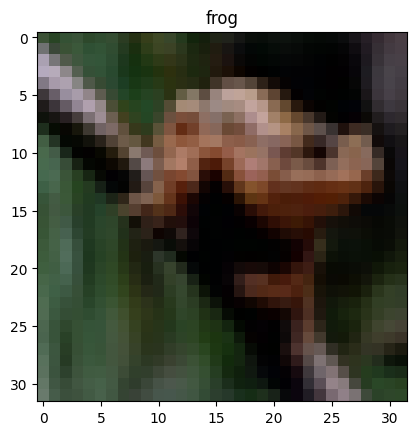

In [10]:
print(train_data[5000][0].shape)
sample_image=train_data[5000][0]
sample_tag=train_data[5000][1]
sample_image=sample_image.permute(1,2,0)
plt.imshow(sample_image)
plt.title(class_names[sample_tag])

## Creating batches of datasets

In [11]:
## Creating a small batch size of 10
train_loader=DataLoader(train_data,batch_size=10,shuffle=True)
test_loader=DataLoader(test_data,batch_size=10, shuffle=False)

## Defining the CNN Model

In [12]:
class Cifar10Model(nn.Module):
  def __init__(self):
    super().__init__()
    ## Conv Layers
    self.conv1=nn.Conv2d(in_channels=3,out_channels=10,kernel_size=3,stride=1)
    self.conv2=nn.Conv2d(in_channels=10,out_channels=20,kernel_size=3,stride=1)
    self.conv3=nn.Conv2d(in_channels=20,out_channels=40,kernel_size=3,stride=1)

    ## Fully Connected Layers
    self.fc1=nn.Linear(2*2*40,80)
    self.fc2=nn.Linear(80,40)
    self.fc3=nn.Linear(40,10)


  def forward(self,X):
    # ReLU activation function and Max Pooling layer
    X=F.relu(self.conv1(X))
    X=F.max_pool2d(X,kernel_size=2,stride=2)
    X=F.relu(self.conv2(X))
    X=F.max_pool2d(X,kernel_size=2,stride=2)
    X=F.relu(self.conv3(X))
    X=F.max_pool2d(X,kernel_size=2,stride=2)

    # Flattening
    X=X.view(-1,2*2*40)

    ## ANN layers
    X=F.relu(self.fc1(X))
    X=F.relu(self.fc2(X))
    X=self.fc3(X)

    # retunrn the value using log softmax function
    return X



In [13]:
Detector=Cifar10Model()

In [14]:
Detector

Cifar10Model(
  (conv1): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(20, 40, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=160, out_features=80, bias=True)
  (fc2): Linear(in_features=80, out_features=40, bias=True)
  (fc3): Linear(in_features=40, out_features=10, bias=True)
)

In [15]:
## Loss Function optimizer
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(Detector.parameters(),lr=0.001)

## Training the  model

In [32]:
# Record the training time
import time
start_time=time.time()
epochs=5
# tracking the losses & correct ones
train_losses=[]
test_losses=[]
train_correct=[]
test_correct=[]

for i in range(epochs):
  trn_corr=0
  tst_corr=0

  #training
  for b,(X_Train,y_train) in enumerate(train_loader):
    b+=1
    y_pred=Detector(X_Train)
    loss=criterion(y_pred,y_train)

    predicted=torch.max(y_pred.data,1)[1]
    batch_corr=(predicted==y_train).sum().item()
    trn_corr+=batch_corr

    #update weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if b%500==0:
      print(f"Epochs: {i+1} Batch: {b} Loss: {loss.item()}")
  train_losses.append(loss.item())
  train_correct.append(trn_corr)

  # Testing

  tst_corr=0
  with torch.no_grad():
    for b,(X_Test,y_test) in enumerate(test_loader):
      y_val=Detector(X_Test)
      predicted=torch.max(y_val.data,1)[1]
      tst_corr+=(predicted==y_test).sum().item()
  loss=criterion(y_val,y_test)

  test_losses.append(loss.item())
  test_correct.append(tst_corr)


current_time=time.time()
total=current_time-start_time

Epochs: 1 Batch: 500 Loss: 0.7303492426872253
Epochs: 1 Batch: 1000 Loss: 1.2012914419174194
Epochs: 1 Batch: 1500 Loss: 0.8796575665473938
Epochs: 1 Batch: 2000 Loss: 1.2228257656097412
Epochs: 1 Batch: 2500 Loss: 1.3054842948913574
Epochs: 1 Batch: 3000 Loss: 0.8749602437019348
Epochs: 1 Batch: 3500 Loss: 1.2384275197982788
Epochs: 1 Batch: 4000 Loss: 0.8726649284362793
Epochs: 1 Batch: 4500 Loss: 1.8082313537597656
Epochs: 1 Batch: 5000 Loss: 1.5353715419769287
Epochs: 2 Batch: 500 Loss: 1.1389644145965576
Epochs: 2 Batch: 1000 Loss: 1.4174400568008423
Epochs: 2 Batch: 1500 Loss: 0.8627006411552429
Epochs: 2 Batch: 2000 Loss: 1.0944650173187256
Epochs: 2 Batch: 2500 Loss: 1.1845582723617554
Epochs: 2 Batch: 3000 Loss: 0.6450902223587036
Epochs: 2 Batch: 3500 Loss: 0.6744508743286133
Epochs: 2 Batch: 4000 Loss: 0.9335060119628906
Epochs: 2 Batch: 4500 Loss: 0.5878003835678101
Epochs: 2 Batch: 5000 Loss: 1.6453790664672852
Epochs: 3 Batch: 500 Loss: 0.7464674711227417
Epochs: 3 Batch:

## Loss Visualization

Text(0.5, 1.0, 'Training loss at Epoch')

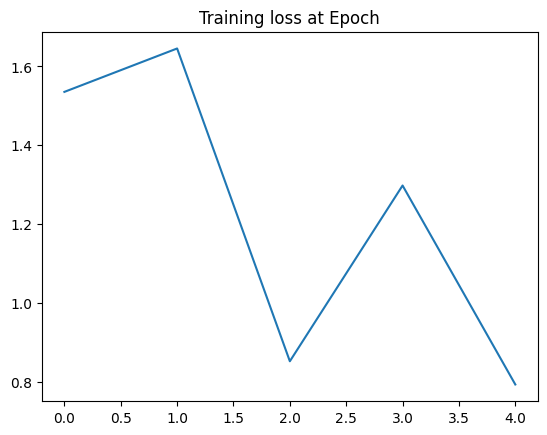

In [33]:
train_losses= [tl for tl in train_losses]

plt.plot(train_losses)
plt.title("Training loss at Epoch")

Text(0.5, 1.0, 'Testing loss at Epoch')

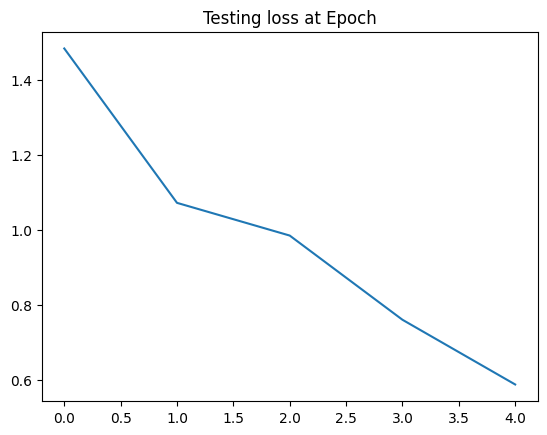

In [34]:

plt.plot(test_losses)
plt.title("Testing loss at Epoch")


## Accuracy Visualization

Text(0.5, 1.0, 'Training Accuracy(Correct) at the end of each epoch')

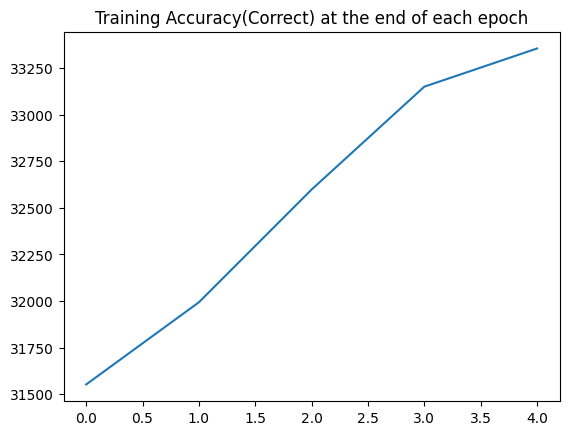

In [35]:
plt.plot([t for t in train_correct])
plt.title("Training Accuracy(Correct) at the end of each epoch")


Text(0.5, 1.0, 'Validation Accuracy at the end of each epoch')

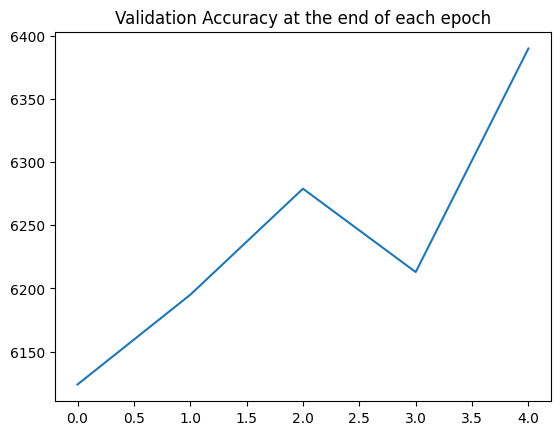

In [36]:
plt.plot([t for t in test_correct])
plt.title("Validation Accuracy at the end of each epoch")

## Try


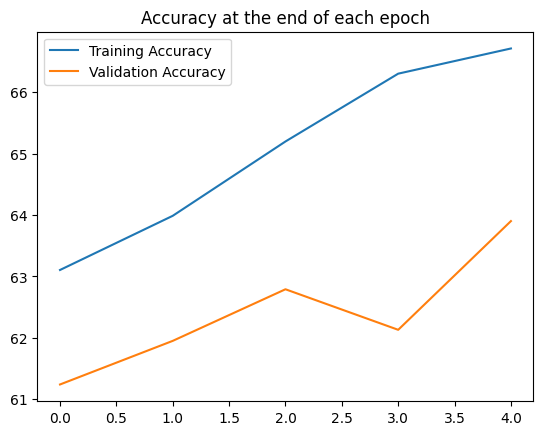

In [37]:
#graph the accuracy at the end of each epoch

plt.plot([t/500 for t in train_correct],label="Training Accuracy")
plt.plot([t/100 for t in test_correct],label="Validation Accuracy")
plt.title("Accuracy at the end of each epoch")
plt.legend()

In [38]:
train_correct

[31552, 31993, 32598, 33150, 33355]

In [39]:
train_losses

[1.5353715419769287,
 1.6453790664672852,
 0.8526102900505066,
 1.2980669736862183,
 0.7937623262405396]

In [40]:
test_correct

[6124, 6195, 6279, 6213, 6390]

In [41]:
test_losses

[1.483281135559082,
 1.071991205215454,
 0.9848135113716125,
 0.7605058550834656,
 0.5880740880966187]